In [179]:
# Importing Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.plotly as py
import plotly.figure_factory as ff
import math
from scipy.stats import norm
from scipy import stats
import csv
from seaborn import timeseries
from scipy.stats import spearmanr

In [180]:
# Importing data
df = pd.DataFrame.from_csv('rawdata/data_revised_2.csv', header=0, sep=',', index_col=0)
df.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls



,age,gender,salary,retirement_age,marital_status,state_of_residence,health_risk_score,salary_growth_rate,salary_risk_score,pensions,...,recommended_account11_name,recommended_account11_pre_tax_contrib,recommended_account11_roth_contrib,recommended_account11_post_tax_contrib,recommended_account11_taxable_contrib,recommended_account12_name,recommended_account12_pre_tax_contrib,recommended_account12_roth_contrib,recommended_account12_post_tax_contrib,recommended_account12_taxable_contrib
name,,,,,,,,,,,,,,,,,,,,,
637,60,M,50000,64,True,IL,0.4,0.005,-1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,59,M,235000,66,True,VA,0.8,0.020,-0.5,95000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,61,M,120000,65,False,PA,0.4,0.015,-0.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
663,65,M,300000,65,False,CO,0.4,0.010,-0.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,69,F,96000,67,True,MO,0.0,0.010,-1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0.2    40.0
0.4    50.0
0.6    59.0
0.8    65.0
Name: age, dtype: float64

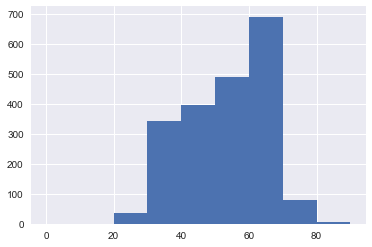

In [181]:
#Visualization 1: Unconditional Distribution of investor ages

#histogram
sns.set()
bins=[0,20,30,40,50,60,70,80,90]
plt.hist(df.age, bins=bins)


#Quantiles
age = df.age
age.quantile([0.2, 0.4,0.6, 0.8])


0.2   -3.0
0.4   -1.0
0.6    1.0
0.8    4.0
dtype: float64

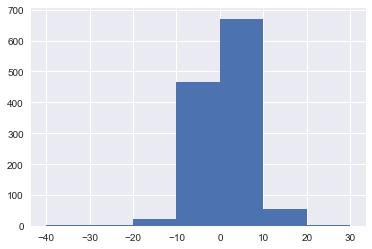

In [249]:
#Visualization 2: Distribution of age difference for married investors
ageMarriedInvestor = df.age[df.marital_status == True]
spouseAgeMarriedInvestor = df.spouse_age[df.marital_status == True]
diff = spouseAgeMarriedInvestor - ageMarriedInvestor

#histogram
sns.set()
bins = [-40, -30, -20,-10,0,10,20,30]
plt.hist(diff, bins=bins)

#Quantiles
diff.quantile([0.2, 0.4, 0.6, 0.8])

Marital Status      Count
----------------  -------
Single                822
Married              1219


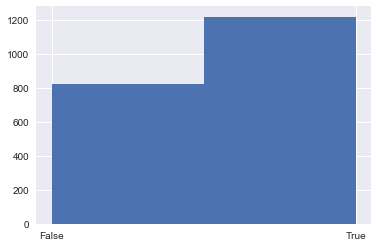

In [183]:
#Visualization 3: Count of single vs. married investors
countMarried = sum(df.marital_status==True)
countMarried

countSingle = sum(df.marital_status==False)
countSingle

#histogram
sns.set()
plt.hist(df.iloc[:,[4]], bins=2)

print tabulate([["Single", countSingle], ["Married", countMarried]], 
         headers=['Marital Status', 'Count'])

In [258]:
# Visualization 4: Distribution of sex, conditional on marital status (2 possible values for single – f, m; 3 for married – f/f/, f/m, m/m)

singleM = df[(df['marital_status']==False) & (df.gender=='M')]
singleF = df[(df['marital_status']==False) & (df.gender=='F')]
singleTot = df[(df['marital_status']==False)]

MM = df[(df['marital_status']==True) & (df.gender=='M') & (df.spouse_gender=='M')]
MF = df[(df['marital_status']==True) & (df.gender=='M') & (df.spouse_gender=='F')]
FF = df[(df['marital_status']==True) & (df.gender=='F') & (df.spouse_gender=='F')]
FM = df[(df['marital_status']==True) & (df.gender=='F') & (df.spouse_gender=='M')]

print tabulate([["Male", singleM.shape[0], MM.shape[0], MF.shape[0]], 
                ["Female", singleF.shape[0], FM.shape[0], FF.shape[0]],
                ["Total", singleTot.shape[0], "708", "501"]],
                  headers=['Investor Gender', 'Single', 'Male Spouse', 'Female Spouse'])


Investor Gender      Single    Male Spouse    Female Spouse
-----------------  --------  -------------  ---------------
Male                    262              9              487
Female                  558            699               14
Total                   822            708              501


Health Risk      Count
-------------  -------
Poor                32
Below Average       82
Average            669
Above Average      755
Excellent          483


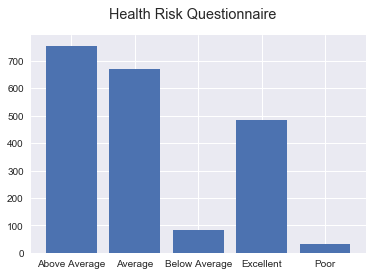

In [7]:
#Visualization 5: Distribution of Health Risk Questionnaire Responses
hs = df.health_risk_score.to_frame()

# removing NaN's
cleanhs = hs[np.isfinite(hs['health_risk_score'])]


Poordf = df.iloc[:,[6]]==-1.0
Poor = Poordf[Poordf.health_risk_score==True]

BelowAveragedf = df.iloc[:,[6]]==-0.6
BelowAverage = BelowAveragedf[BelowAveragedf.health_risk_score==True]

Averagedf = df.iloc[:,[6]]==0.0
Average = Averagedf[Averagedf.health_risk_score==True]

AboveAveragedf = df.iloc[:,[6]]==0.4
AboveAverage = AboveAveragedf[AboveAveragedf.health_risk_score==True]

Excellentdf = df.iloc[:,[6]]==0.8
Excellent = Excellentdf[Excellentdf.health_risk_score==True]


data = {'Poor': Poor.shape[0], 'Below Average': BelowAverage.shape[0], 
        'Average': Average.shape[0], 'Above Average': AboveAverage.shape[0],
        'Excellent': Excellent.shape[0]}
names = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
ax.bar(names, values)
fig.suptitle('Health Risk Questionnaire')


print tabulate([["Poor", Poor.shape[0]], ["Below Average", BelowAverage.shape[0]], 
               ["Average", Average.shape[0]], ["Above Average", AboveAverage.shape[0]],
               ["Excellent", Excellent.shape[0]]], 
         headers=['Health Risk', 'Count'])



# how does health score relate to age group?

Salary Risk                    Count
---------------------------  -------
Very Unlikely                   1186
Unlikely                         386
Neither Unlikely nor Likely      252
Likely                           153
Very Likely                       44


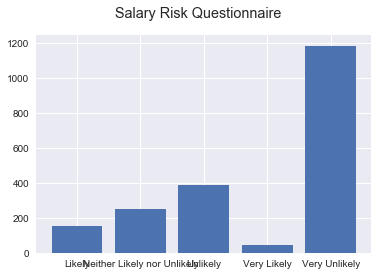

In [185]:
#Visualization 6: Distribution of Salary Risk Questionnaire Responses

salaryRisk = df.iloc[:,[8]]

# removing NaN's
cleanSalaryRisk = salaryRisk[np.isfinite(salaryRisk['salary_risk_score'])]
pd.unique(cleanSalaryRisk['salary_risk_score'])


VeryUnlikelydf = df.iloc[:,[8]]==-1.0
VeryUnlikely = VeryUnlikelydf[VeryUnlikelydf.salary_risk_score==True]

Unlikelydf = df.iloc[:,[8]]==-0.5
Unlikely = Unlikelydf[Unlikelydf.salary_risk_score==True]

Neutraldf = df.iloc[:,[8]]==0.0
Neutral = Neutraldf[Neutraldf.salary_risk_score==True]

Likelydf = df.iloc[:,[8]]==0.5
Likely = Likelydf[Likelydf.salary_risk_score==True]

VeryLikelydf = df.iloc[:,[8]]==1.0
VeryLikely = VeryLikelydf[VeryLikelydf.salary_risk_score==True]


data = {'Very Unlikely': VeryUnlikely.shape[0], 'Unlikely': Unlikely.shape[0], 
        'Neither Likely nor Unlikely': Neutral.shape[0], 'Likely': Likely.shape[0],
        'Very Likely': VeryLikely.shape[0]}
names = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
ax.bar(names, values)
fig.suptitle('Salary Risk Questionnaire')


print tabulate([["Very Unlikely", VeryUnlikely.shape[0]], ["Unlikely", Unlikely.shape[0]], 
               ["Neither Unlikely nor Likely", Neutral.shape[0]], ["Likely", Likely.shape[0]],
               ["Very Likely", VeryLikely.shape[0]]], 
         headers=['Salary Risk', 'Count'])


#How does salary correlate to salary risk?

,retirement_age
0.2,64.0
0.4,65.0
0.6,67.0
0.8,67.0


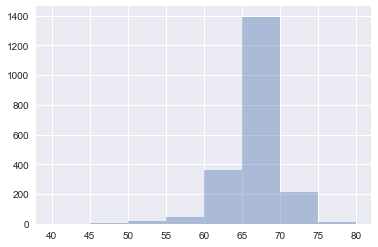

In [265]:
#Visualization 8.1: Distribution of desired retirement ages

# distribution data
retirementAge = df.iloc[:,[3]]
sns.set()
bins=[40, 45, 50, 55, 60, 65, 70, 75, 80]
sns.distplot(retirementAge, kde=False, bins=bins)

# quartiles or quantile data
retirementAge.quantile([0.2, 0.4, 0.6, 0.8])


,retirement_age
0.2,64.0
0.4,65.0
0.6,67.0
0.8,67.0


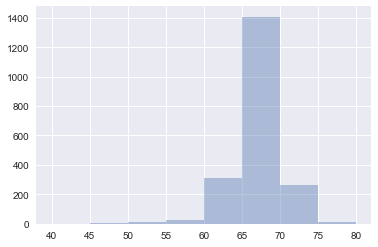

In [267]:
#Visualization 8.2: Distribution of recommended retirement ages

# distribution data
recRetirementAge = df.iloc[:,[102]]
sns.set()
bins=[40, 45, 50, 55, 60, 65, 70, 75, 80]
sns.distplot(recRetirementAge, kde=False, bins=bins)

# quartiles or quantile data
retirementAge.quantile([0.2, 0.4, 0.6, 0.8])

0.2   -2.0
0.4    0.0
0.6    0.0
0.8    0.0
dtype: float64

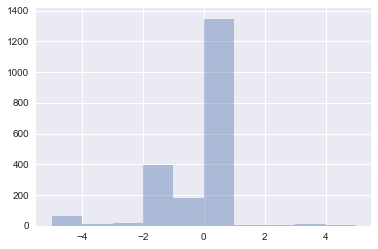

In [282]:
#Visualization 8.3: Distribution of difference in desired and recommended retirement ages

new = df.iloc[:,[3, 102]]
dif = new['retirement_age'] - new['recommended_retirement_age']

sns.set()
bins=[-5, -4, -3,-2,-1,0,1,2,3,4,5]
sns.distplot(difference, kde=False, bins=bins)


#quartiles or quantile data
difference.quantile([0.2,0.4,0.6,0.8])

,salary
0.2,40000.0
0.4,55000.0
0.6,75000.0
0.8,100000.0


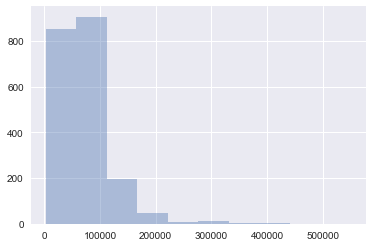

In [288]:
#Visualization 9: Distribution of Salary (Unconditional)
salary = df.iloc[:,[2]]
cleanSalary = salary[salary['salary']>1000]

sns.set()
#bins=[0,25000,40000,50000,60000,75000,100000, 200000, 500000, 750000]
sns.distplot(cleanSalary, kde=False, bins=10)

#quantiles
cleanSalary.quantile([0.2,0.4,0.6,0.8])

,salary,combined_salary
0.2,39000.0,45000.0
0.4,52000.0,60001.0
0.6,70000.0,80000.0
0.8,93000.0,110000.0


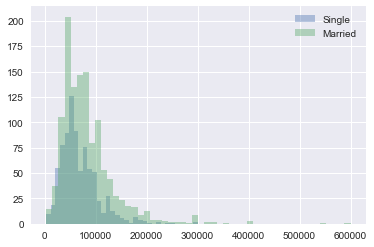

In [190]:
#Visualization 10: Distribution of Salary conditional on marital status

salaryAndMarital = df.iloc[:,[2, 4, 15]]

#single
singleSalaryAndMarital = salaryAndMarital[salaryAndMarital.marital_status==False]
singleSalary = singleSalaryAndMarital.iloc[:,[0]]
singleClean = singleSalary[np.isfinite(singleSalary['salary']) & (singleSalary['salary']>1000)]


#married
marriedSalaryAndMarital = salaryAndMarital[salaryAndMarital.marital_status==True]
marriedSalary = marriedSalaryAndMarital.iloc[:,[0, 2]]
marriedSalary['combined_salary'] = marriedSalary['salary'] + marriedSalary['spouse_salary'] 
marriedCombined = marriedSalary.iloc[:,[2]]
marriedClean = marriedCombined[np.isfinite(marriedCombined['combined_salary']) & (marriedCombined['combined_salary']>1000)]


#plotting
sns.distplot(singleClean, kde=False, label="Single")
sns.distplot(marriedClean, kde=False, label="Married")
plt.legend()


# quartiles 
quantileMarried = marriedClean.quantile([0.2,0.4,0.6,0.8])
quantileSingle = singleClean.quantile([0.2,0.4,0.6,0.8])
quantileSingle.join(quantileMarried, lsuffix='salary', rsuffix='combined_salary')



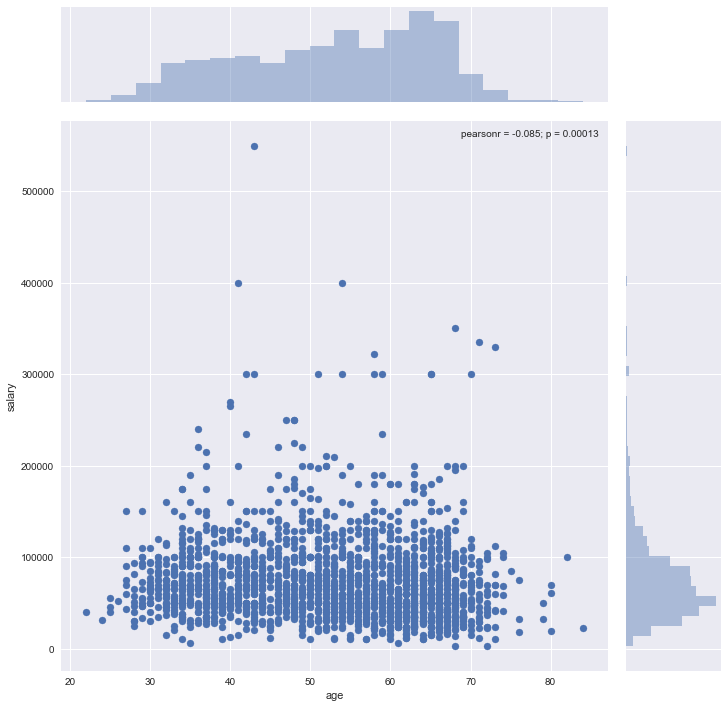

In [191]:
#Visualization 11: Distribution of Salary conditional on age

salary = df.iloc[:,[0, 2]]
cleanSalary = salary[salary['salary']>1000]


sns.jointplot(x="age", y="salary", data=cleanSalary, size=10)

#filter retirement users out

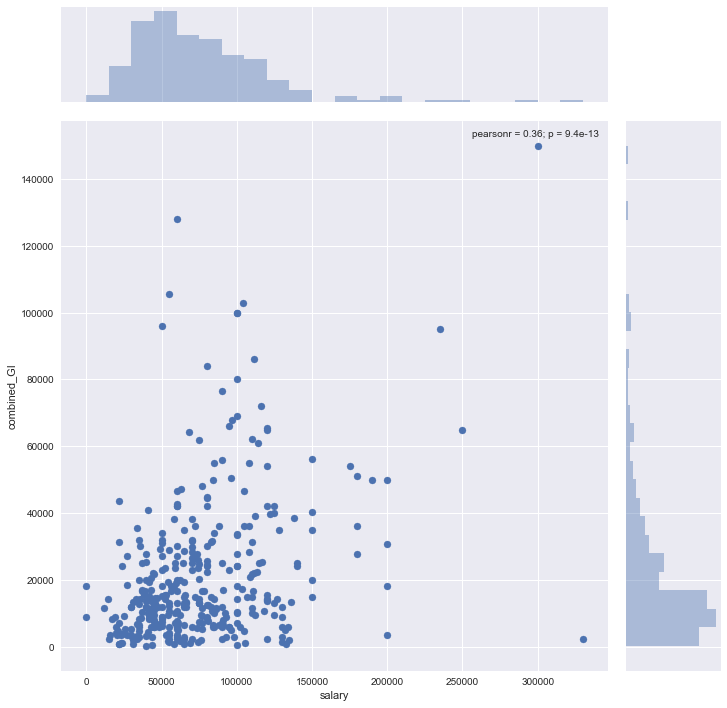

In [192]:
#Visualization 12: Distribution of combined pension and annuity as % of salary


vis12 = df.iloc[:,[2, 9, 10]]

vis12['combined_GI'] = vis12['pensions'] + vis12['annuities'] 

## let's filter out people don't have pensions and annuity 
vis12Clean = vis12[vis12.combined_GI!=0]


sns.jointplot(x="salary", y="combined_GI", data=vis12Clean, size = 10)

0.2    1.476597
0.4    2.000000
0.6    2.160000
0.8    2.530909
Name: ratio, dtype: float64

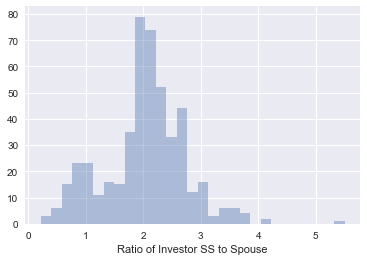

In [193]:
#Visualization 13: Distribution of ratio of spouse social security benefit to investor (only married investors)
vis13 = df.iloc[:,[11, 17]]
cleanSpouseSS = vis13[vis13.spouse_social_security_benefit>1]
cleanSpouseSS['ratio'] = cleanSpouseSS['social_security_benefit']/cleanSpouseSS['spouse_social_security_benefit']
sns.distplot(cleanSpouseSS.ratio, kde=False, axlabel="Ratio of Investor SS to Spouse")

#quantiles
cleanSpouseSS.ratio.quantile([0.2, 0.4, 0.6, 0.8])

#add filter for salary > 1000

('Ratio of non-zero balance to total:', 82.10880538418395)
('Ratio of zero balance to total:', 17.89119461581604)


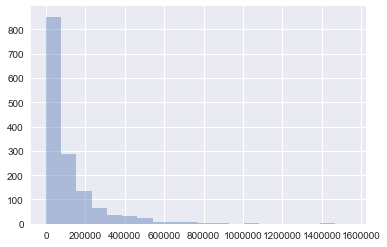

In [203]:
#Visualizations 14: Distribution of Sum of Advisable IRA Balance – unconditional

# Roth IRA
df.name_type_1.unique()
roth_ira_1 = df.balance_1[df.name_type_1 == "roth_ira"]
roth_ira_2 = df.balance_2[df.name_type_2 == "roth_ira"]
roth_ira_3 = df.balance_3[df.name_type_3 == "roth_ira"]
roth_ira_4 = df.balance_4[df.name_type_4 == "roth_ira"]
roth_ira_5 = df.balance_5[df.name_type_5 == "roth_ira"]
roth_ira_6 = df.balance_6[df.name_type_6 == "roth_ira"]
roth_ira_7 = df.balance_7[df.name_type_7 == "roth_ira"]
roth_ira_8 = df.balance_8[df.name_type_8 == "roth_ira"]
roth_ira_9 = df.balance_9[df.name_type_9 == "roth_ira"]
roth_ira_10 = df.balance_10[df.name_type_10 == "roth_ira"]
roth_ira_11 = df.balance_11[df.name_type_11 == "roth_ira"]
#traditional IRA
traditional_ira_1 = df.balance_1[df.name_type_1 == "traditional_ira"]
traditional_ira_2 = df.balance_2[df.name_type_2 == "traditional_ira"]
traditional_ira_3 = df.balance_3[df.name_type_3 == "traditional_ira"]
traditional_ira_4 = df.balance_4[df.name_type_4 == "traditional_ira"]
traditional_ira_5 = df.balance_5[df.name_type_5 == "traditional_ira"]
traditional_ira_6 = df.balance_6[df.name_type_6 == "traditional_ira"]
traditional_ira_7 = df.balance_7[df.name_type_7 == "traditional_ira"]
traditional_ira_8 = df.balance_8[df.name_type_8 == "traditional_ira"]
traditional_ira_9 = df.balance_9[df.name_type_9 == "traditional_ira"]
traditional_ira_10 = df.balance_10[df.name_type_10 == "traditional_ira"]
traditional_ira_11 = df.balance_11[df.name_type_11 == "traditional_ira"]

#Brokerage
brokerage_1 = df.balance_1[df.name_type_1 == "brokerage"]
brokerage_2 = df.balance_2[df.name_type_2 == "brokerage"]
brokerage_3 = df.balance_3[df.name_type_3 == "brokerage"]
brokerage_4 = df.balance_4[df.name_type_4 == "brokerage"]
brokerage_5 = df.balance_5[df.name_type_5 == "brokerage"]
brokerage_6 = df.balance_6[df.name_type_6 == "brokerage"]
brokerage_7 = df.balance_7[df.name_type_7 == "brokerage"]
brokerage_8 = df.balance_8[df.name_type_8 == "brokerage"]
brokerage_9 = df.balance_9[df.name_type_9 == "brokerage"]
brokerage_10 = df.balance_10[df.name_type_10 == "brokerage"]
brokerage_11 = df.balance_11[df.name_type_11 == "brokerage"]


IRA = [roth_ira_1, roth_ira_2, roth_ira_3, roth_ira_4, 
            roth_ira_5, roth_ira_6, roth_ira_7, roth_ira_8, 
            roth_ira_9, roth_ira_10, roth_ira_11,
      traditional_ira_1, traditional_ira_2, traditional_ira_3, 
      traditional_ira_4, traditional_ira_5, traditional_ira_6, 
      traditional_ira_7, traditional_ira_8, traditional_ira_9, 
      traditional_ira_10, traditional_ira_11]


Brokerage = [brokerage_1, brokerage_2, brokerage_3, brokerage_4, 
            brokerage_5, brokerage_6, brokerage_7, brokerage_8, 
            brokerage_9, brokerage_10, brokerage_11]



# account balance must be greater than $0 
iraAccounts = pd.DataFrame(pd.concat(IRA))
iraAccounts.columns = ['ira_balance']
cleanIRA = iraAccounts[iraAccounts.ira_balance > 1]
#bins=[0,25000,50000,75000,100000,150000,500000,2500000]
sns.distplot(cleanIRA, kde=False, bins=20)


# proportion of users with $0 vs non-zero balance
dirtyIRA = iraAccounts[iraAccounts.ira_balance < 1]
countClean = cleanIRA.shape[0]
countDirty = dirtyIRA.shape[0]
countAll = iraAccounts.shape[0]


print('Ratio of non-zero balance to total:', (100*(np.true_divide(countClean, countAll))))
print('Ratio of zero balance to total:', (100*(np.true_divide(countDirty, countAll))))

# ratio of sum of balances to salary 
cleanIRAWSalary = cleanIRA.merge(df[['salary']], left_index=True, right_index=True)
cleanIRAWSalaryRatio = pd.DataFrame(np.true_divide(cleanIRAWSalary.ira_balance, cleanIRAWSalary.salary))

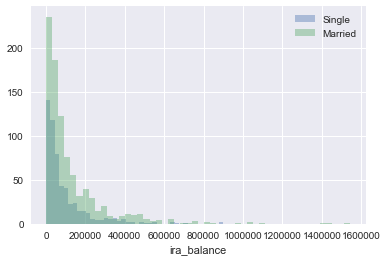

In [212]:
# Visualization 15: Distribution of Sum of Advisable IRA Balance – conditional on marital status
iradf = pd.concat(IRA)
iradf = iradf.to_frame()
iradf.columns = ['ira_balance']

iraMarital = iradf.merge(df[['marital_status']], left_index=True, right_index=True)
iraSingle = iraMarital[(iraMarital.ira_balance>0) & (iraMarital.marital_status==False)]
iraMarried = iraMarital[(iraMarital.ira_balance>0) & (iraMarital.marital_status==True)]

sns.distplot(iraSingle.ira_balance, kde=False, label="Single")
sns.distplot(iraMarried.ira_balance, kde=False, label = "Married")
plt.legend()

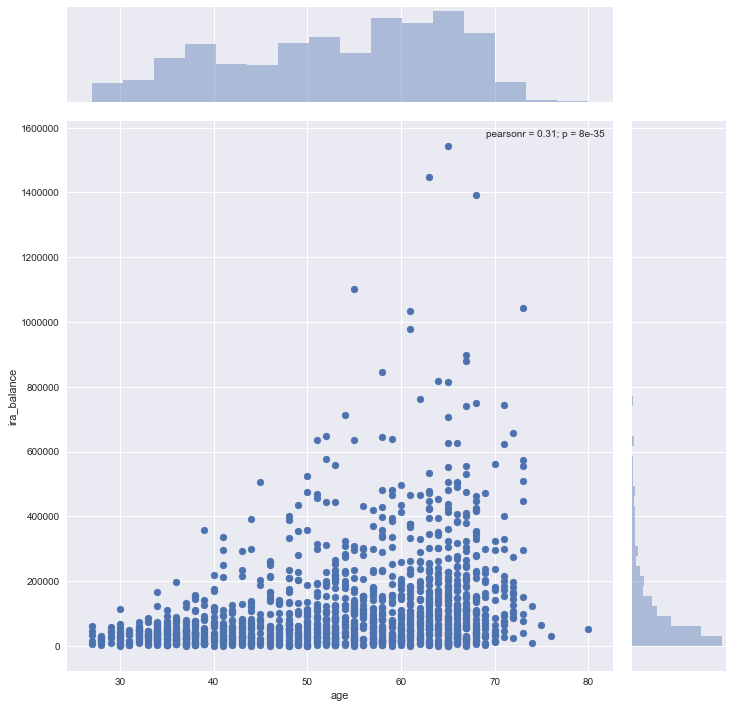

In [218]:
# Visualization 16: Distribution of Sum of Advisable IRA Balance – conditional on age
iraAge = iradf.merge(df[['age']], left_index=True, right_index=True)
iraAgeClean = iraAge[iraAge.ira_balance>0]
sns.jointplot(x="age", y="ira_balance", data=iraAgeClean, size = 10)

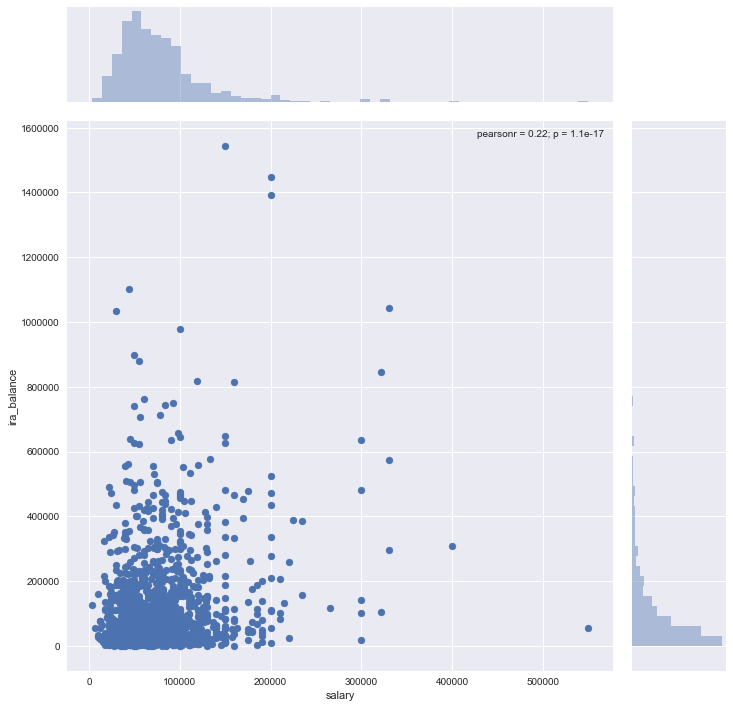

In [222]:
# Visualization 17: Distribution of Sum of Advisable IRA Balance – conditional on salary

iraSalary = iradf.merge(df[['salary']], left_index=True, right_index=True)
iraSalaryClean = iraSalary[(iraSalary.ira_balance>0) & (iraSalary.salary>1000)]
sns.jointplot(x="salary", y="ira_balance", data=iraSalaryClean, size = 10)

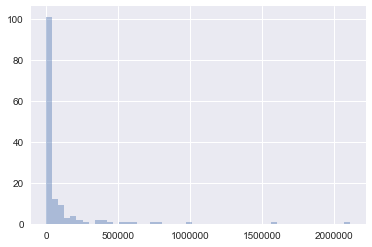

In [225]:
# Visualization 18: Distribution of Sum of Advisable Taxable Brokerage Account Balance – unconditional
brokeragedf = pd.concat(Brokerage)
brokeragedf = brokeragedf.to_frame()
brokeragedf.columns = ['brokerage_balance']
sns.distplot(brokeragedf, kde=False)

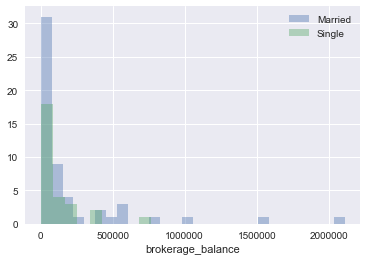

In [227]:
# Visualization 19: Distribution of Sum of Advisable Taxable Brokerage Balance – conditional on marital status

brokerageMarital = brokeragedf.merge(df[['marital_status']], left_index=True, right_index=True)
brokerageSingle = brokerageMarital[(brokerageMarital.brokerage_balance>0) & (brokerageMarital.marital_status==False)]
brokerageMarried = brokerageMarital[(brokerageMarital.brokerage_balance>0) & (brokerageMarital.marital_status==True)]

sns.distplot(brokerageMarried.brokerage_balance, kde=False, label = "Married")
sns.distplot(brokerageSingle.brokerage_balance, kde=False, label="Single")
plt.legend()

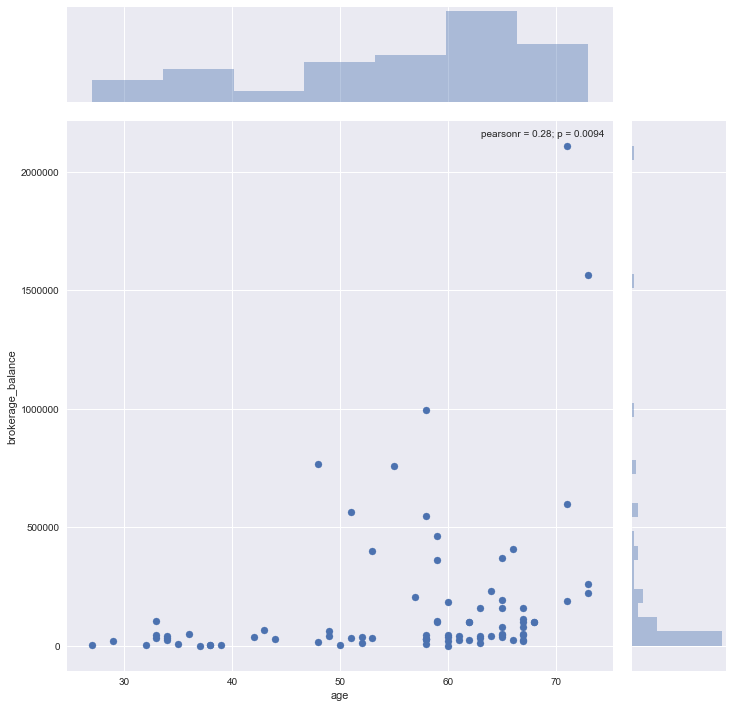

In [228]:
# Visualization 20: Distribution of Sum of Taxable Brokerage Balance – conditional on age
brokerageAge = brokeragedf.merge(df[['age']], left_index=True, right_index=True)
brokerageAgeClean = brokerageAge[brokerageAge.brokerage_balance>0]
sns.jointplot(x="age", y="brokerage_balance", data=brokerageAgeClean, size = 10)

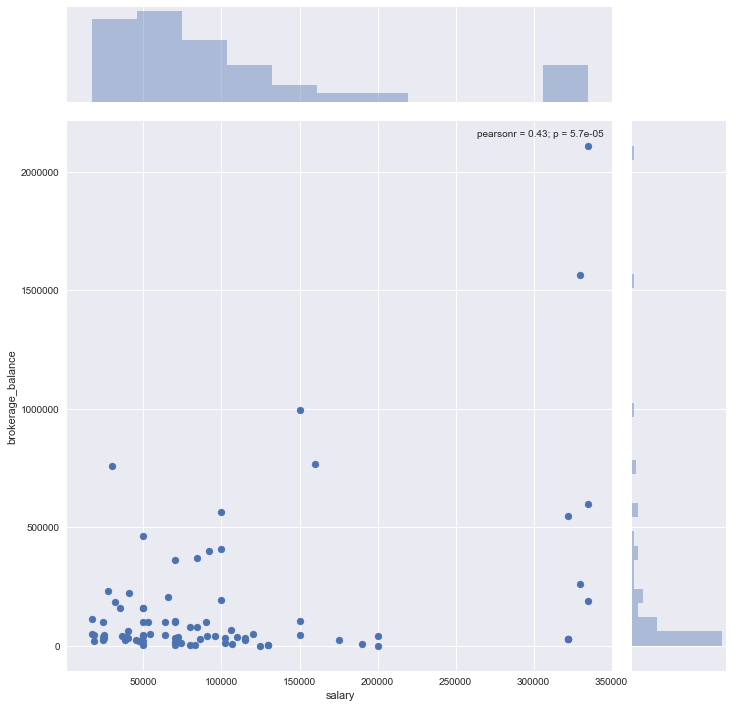

In [229]:
# Visualization 21: Distribution of Sum of Taxable Brokerage Balance – conditional on salary
brokerageSalary = brokeragedf.merge(df[['salary']], left_index=True, right_index=True)
brokerageSalaryClean = brokerageSalary[(brokerageSalary.brokerage_balance>0) & (brokerageSalary.salary>1000)]
sns.jointplot(x="salary", y="brokerage_balance", data=brokerageSalaryClean, size = 10)

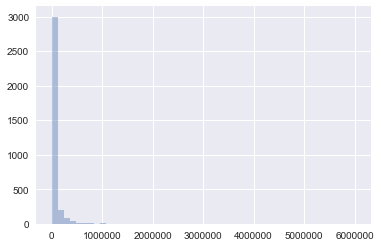

In [230]:
# Visualization 22: Distribution of Sum of Other Account Balance – unconditional

# 403b
account_1_403b = df.balance_1[df.name_type_1 == "403b"]
account_2_403b = df.balance_2[df.name_type_2 == "403b"]
account_3_403b = df.balance_3[df.name_type_3 == "403b"]
account_4_403b = df.balance_4[df.name_type_4 == "403b"]
account_5_403b = df.balance_5[df.name_type_5 == "403b"]
account_6_403b = df.balance_6[df.name_type_6 == "403b"]
account_7_403b = df.balance_7[df.name_type_7 == "403b"]
account_8_403b = df.balance_8[df.name_type_8 == "403b"]
account_9_403b = df.balance_9[df.name_type_9 == "403b"]
account_10_403b = df.balance_9[df.name_type_10 == "403b"]
account_11_403b = df.balance_9[df.name_type_11 == "403b"]

#account_403b = [account_1_403b, account_2_403b, account_3_403b, account_4_403b, 
#            account_5_403b, account_6_403b, account_7_403b, account_8_403b, 
#            account_9_403b, account_10_403b, account_11_403b]
#sns.distplot(pd.concat(account_403b))

# 401k
account_1_401k = df.balance_1[df.name_type_1 == "401k"]
account_2_401k = df.balance_2[df.name_type_2 == "401k"]
account_3_401k = df.balance_3[df.name_type_3 == "401k"]
account_4_401k = df.balance_4[df.name_type_4 == "401k"]
account_5_401k = df.balance_5[df.name_type_5 == "401k"]
account_6_401k = df.balance_6[df.name_type_6 == "401k"]
account_7_401k = df.balance_7[df.name_type_7 == "401k"]
account_8_401k = df.balance_8[df.name_type_8 == "401k"]
account_9_401k = df.balance_9[df.name_type_9 == "401k"]
account_10_401k = df.balance_9[df.name_type_10 == "401k"]
account_11_401k = df.balance_9[df.name_type_11 == "401k"]

#account_401k = [account_1_401k, account_2_401k, account_3_401k, account_4_401k, 
#            account_5_401k, account_6_401k, account_7_401k, account_8_401k, 
#            account_9_401k, account_10_401k, account_11_401k]

# non_qualified_defined_contribution
account_1_nqdc = df.balance_1[df.name_type_1 == "non_qualified_defined_contribution"]
account_2_nqdc = df.balance_2[df.name_type_2 == "non_qualified_defined_contribution"]
account_3_nqdc = df.balance_3[df.name_type_3 == "non_qualified_defined_contribution"]
account_4_nqdc = df.balance_4[df.name_type_4 == "non_qualified_defined_contribution"]
account_5_nqdc = df.balance_5[df.name_type_5 == "non_qualified_defined_contribution"]
account_6_nqdc = df.balance_6[df.name_type_6 == "non_qualified_defined_contribution"]
account_7_nqdc = df.balance_7[df.name_type_7 == "non_qualified_defined_contribution"]
account_8_nqdc = df.balance_8[df.name_type_8 == "non_qualified_defined_contribution"]
account_9_nqdc = df.balance_9[df.name_type_9 == "non_qualified_defined_contribution"]
account_10_nqdc = df.balance_9[df.name_type_10 == "non_qualified_defined_contribution"]
account_11_nqdc = df.balance_9[df.name_type_11 == "non_qualified_defined_contribution"]

#account_nqdc = [account_1_nqdc, account_2_nqdc, account_3_nqdc, account_4_nqdc, 
#            account_5_nqdc, account_6_nqdc, account_7_nqdc, account_8_nqdc, 
#            account_9_nqdc, account_10_nqdc, account_11_nqdc]

# profit_sharing
account_1_ps = df.balance_1[df.name_type_1 == "profit_sharing"]
account_2_ps = df.balance_2[df.name_type_2 == "profit_sharing"]
account_3_ps = df.balance_3[df.name_type_3 == "profit_sharing"]
account_4_ps = df.balance_4[df.name_type_4 == "profit_sharing"]
account_5_ps = df.balance_5[df.name_type_5 == "profit_sharing"]
account_6_ps = df.balance_6[df.name_type_6 == "profit_sharing"]
account_7_ps = df.balance_7[df.name_type_7 == "profit_sharing"]
account_8_ps = df.balance_8[df.name_type_8 == "profit_sharing"]
account_9_ps = df.balance_9[df.name_type_9 == "profit_sharing"]
account_10_ps = df.balance_9[df.name_type_10 == "profit_sharing"]
account_11_ps = df.balance_9[df.name_type_11 == "profit_sharing"]

#account_ps = [account_1_ps, account_2_ps, account_3_ps, account_4_ps, 
#            account_5_ps, account_6_ps, account_7_ps, account_8_ps, 
#            account_9_ps, account_10_ps, account_11_ps]

# 401a
account_1_401a = df.balance_1[df.name_type_1 == "401a_money_purchase"]
account_2_401a = df.balance_2[df.name_type_2 == "401a_money_purchase"]
account_3_401a = df.balance_3[df.name_type_3 == "401a_money_purchase"]
account_4_401a = df.balance_4[df.name_type_4 == "401a_money_purchase"]
account_5_401a = df.balance_5[df.name_type_5 == "401a_money_purchase"]
account_6_401a = df.balance_6[df.name_type_6 == "401a_money_purchase"]
account_7_401a = df.balance_7[df.name_type_7 == "401a_money_purchase"]
account_8_401a = df.balance_8[df.name_type_8 == "401a_money_purchase"]
account_9_401a = df.balance_9[df.name_type_9 == "401a_money_purchase"]
account_10_401a = df.balance_9[df.name_type_10 == "401a_money_purchase"]
account_11_401a = df.balance_9[df.name_type_11 == "401a_money_purchase"]

#account_401a = [account_1_401a, account_2_401a, account_3_401a, account_4_401a, 
#            account_5_401a, account_6_401a, account_7_401a, account_8_401a, 
#            account_9_401a, account_10_401a, account_11_401a]

# 457b
account_1_457b = df.balance_1[df.name_type_1 == "457b"]
account_2_457b = df.balance_2[df.name_type_2 == "457b"]
account_3_457b = df.balance_3[df.name_type_3 == "457b"]
account_4_457b = df.balance_4[df.name_type_4 == "457b"]
account_5_457b = df.balance_5[df.name_type_5 == "457b"]
account_6_457b = df.balance_6[df.name_type_6 == "457b"]
account_7_457b = df.balance_7[df.name_type_7 == "457b"]
account_8_457b = df.balance_8[df.name_type_8 == "457b"]
account_9_457b = df.balance_9[df.name_type_9 == "457b"]
account_10_457b = df.balance_9[df.name_type_10 == "457b"]
account_11_457b = df.balance_9[df.name_type_11 == "457b"]

#account_457b = [account_1_457b, account_2_457b, account_3_457b, account_4_457b, 
#            account_5_457b, account_6_457b, account_7_457b, account_8_457b, 
#            account_9_457b, account_10_457b, account_11_457b]

# 457b_government
account_1_457b_gov = df.balance_1[df.name_type_1 == "457b_government"]
account_2_457b_gov = df.balance_2[df.name_type_2 == "457b_government"]
account_3_457b_gov = df.balance_3[df.name_type_3 == "457b_government"]
account_4_457b_gov = df.balance_4[df.name_type_4 == "457b_government"]
account_5_457b_gov = df.balance_5[df.name_type_5 == "457b_government"]
account_6_457b_gov = df.balance_6[df.name_type_6 == "457b_government"]
account_7_457b_gov = df.balance_7[df.name_type_7 == "457b_government"]
account_8_457b_gov = df.balance_8[df.name_type_8 == "457b_government"]
account_9_457b_gov = df.balance_9[df.name_type_9 == "457b_government"]
account_10_457b_gov = df.balance_9[df.name_type_10 == "457b_government"]
account_11_457b_gov = df.balance_9[df.name_type_11 == "457b_government"]

#account_457b_gov = [account_1_457b_gov, account_2_457b_gov, 
#            account_3_457b_gov, account_4_457b_gov, 
#            account_5_457b_gov, account_6_457b_gov, 
#            account_7_457b_gov, account_8_457b_gov, 
#            account_9_457b_gov, account_10_457b_gov, 
#            account_11_457b_gov]


# 457b_non_profit
account_1_457b_np = df.balance_1[df.name_type_1 == "457b_non_profit"]
account_2_457b_np = df.balance_2[df.name_type_2 == "457b_non_profit"]
account_3_457b_np = df.balance_3[df.name_type_3 == "457b_non_profit"]
account_4_457b_np = df.balance_4[df.name_type_4 == "457b_non_profit"]
account_5_457b_np = df.balance_5[df.name_type_5 == "457b_non_profit"]
account_6_457b_np = df.balance_6[df.name_type_6 == "457b_non_profit"]
account_7_457b_np = df.balance_7[df.name_type_7 == "457b_non_profit"]
account_8_457b_np = df.balance_8[df.name_type_8 == "457b_non_profit"]
account_9_457b_np = df.balance_9[df.name_type_9 == "457b_non_profit"]
account_10_457b_np = df.balance_9[df.name_type_10 == "457b_non_profit"]
account_11_457b_np = df.balance_9[df.name_type_11 == "457b_non_profit"]

#account_457b_np = [account_1_457b_np, account_2_457b_np, 
#            account_3_457b_np, account_4_457b_np, 
#            account_5_457b_np, account_6_457b_np, 
#            account_7_457b_np, account_8_457b_np, 
#            account_9_457b_np, account_10_457b_np, 
#            account_11_457b_np]


# esop
account_1_esop = df.balance_1[df.name_type_1 == "esop"]
account_2_esop = df.balance_2[df.name_type_2 == "esop"]
account_3_esop = df.balance_3[df.name_type_3 == "esop"]
account_4_esop = df.balance_4[df.name_type_4 == "esop"]
account_5_esop = df.balance_5[df.name_type_5 == "esop"]
account_6_esop = df.balance_6[df.name_type_6 == "esop"]
account_7_esop = df.balance_7[df.name_type_7 == "esop"]
account_8_esop = df.balance_8[df.name_type_8 == "esop"]
account_9_esop = df.balance_9[df.name_type_9 == "esop"]
account_10_esop = df.balance_9[df.name_type_10 == "esop"]
account_11_esop = df.balance_9[df.name_type_11 == "esop"]

#account_esop = [account_1_esop, account_2_esop, account_3_esop, account_4_esop, 
#            account_5_esop, account_6_esop, account_7_esop, account_8_esop, 
#            account_9_esop, account_10_esop, account_11_esop]

# checking
account_1_checking = df.balance_1[df.name_type_1 == "checking"]
account_2_checking = df.balance_2[df.name_type_2 == "checking"]
account_3_checking = df.balance_3[df.name_type_3 == "checking"]
account_4_checking = df.balance_4[df.name_type_4 == "checking"]
account_5_checking = df.balance_5[df.name_type_5 == "checking"]
account_6_checking = df.balance_6[df.name_type_6 == "checking"]
account_7_checking = df.balance_7[df.name_type_7 == "checking"]
account_8_checking = df.balance_8[df.name_type_8 == "checking"]
account_9_checking = df.balance_9[df.name_type_9 == "checking"]
account_10_checking = df.balance_9[df.name_type_10 == "checking"]
account_11_checking = df.balance_9[df.name_type_11 == "checking"]

#account_checking = [account_1_checking, account_2_checking, account_3_checking, 
#            account_4_checking, account_5_checking, account_6_checking, 
#            account_7_checking, account_8_checking, 
#            account_9_checking, account_10_checking, 
#            account_11_checking]


# thrift_savings_plan
account_1_tsp = df.balance_1[df.name_type_1 == "thrift_savings_plan"]
account_2_tsp = df.balance_2[df.name_type_2 == "thrift_savings_plan"]
account_3_tsp = df.balance_3[df.name_type_3 == "thrift_savings_plan"]
account_4_tsp = df.balance_4[df.name_type_4 == "thrift_savings_plan"]
account_5_tsp = df.balance_5[df.name_type_5 == "thrift_savings_plan"]
account_6_tsp = df.balance_6[df.name_type_6 == "thrift_savings_plan"]
account_7_tsp = df.balance_7[df.name_type_7 == "thrift_savings_plan"]
account_8_tsp = df.balance_8[df.name_type_8 == "thrift_savings_plan"]
account_9_tsp = df.balance_9[df.name_type_9 == "thrift_savings_plan"]
account_10_tsp = df.balance_9[df.name_type_10 == "thrift_savings_plan"]
account_11_tsp = df.balance_9[df.name_type_11 == "thrift_savings_plan"]

#account_tsp = [account_1_tsp, account_2_tsp, account_3_tsp, account_4_tsp, 
#            account_5_tsp, account_6_tsp, account_7_tsp, account_8_tsp, 
#            account_9_tsp, account_10_tsp, account_11_tsp]


#other_accounts = [account_403b, account_401k, account_nqdc, account_ps,
#                 account_401a, account_457b, account_457b_gov, account_457b_np,
#                 account_esop, account_checking, account_tsp]


other_accounts = [
    #403b
    account_1_403b, account_2_403b, account_3_403b, account_4_403b, 
    account_5_403b, account_6_403b, account_7_403b, account_8_403b, 
    account_9_403b, account_10_403b, account_11_403b,
    
    #401k
    account_1_401k, account_2_401k, account_3_401k, account_4_401k, 
    account_5_401k, account_6_401k, account_7_401k, account_8_401k, 
    account_9_401k, account_10_401k, account_11_401k,
    
    #nqdc
    account_1_nqdc, account_2_nqdc, account_3_nqdc, account_4_nqdc, 
    account_5_nqdc, account_6_nqdc, account_7_nqdc, account_8_nqdc, 
    account_9_nqdc, account_10_nqdc, account_11_nqdc,
    
    #ps
    account_1_ps, account_2_ps, account_3_ps, account_4_ps, 
    account_5_ps, account_6_ps, account_7_ps, account_8_ps, 
    account_9_ps, account_10_ps, account_11_ps,
    
    #401a
    account_1_401a, account_2_401a, account_3_401a, account_4_401a, 
    account_5_401a, account_6_401a, account_7_401a, account_8_401a, 
    account_9_401a, account_10_401a, account_11_401a,
    
    #457b
    account_1_457b, account_2_457b, account_3_457b, account_4_457b, 
    account_5_457b, account_6_457b, account_7_457b, account_8_457b, 
    account_9_457b, account_10_457b, account_11_457b,
    
    #457b_gov
    account_1_457b_gov, account_2_457b_gov, 
    account_3_457b_gov, account_4_457b_gov, 
    account_5_457b_gov, account_6_457b_gov, 
    account_7_457b_gov, account_8_457b_gov, 
    account_9_457b_gov, account_10_457b_gov, 
    account_11_457b_gov,
    
    #457b_np
    account_1_457b_np, account_2_457b_np, 
    account_3_457b_np, account_4_457b_np, 
    account_5_457b_np, account_6_457b_np, 
    account_7_457b_np, account_8_457b_np, 
    account_9_457b_np, account_10_457b_np, 
    account_11_457b_np,
    
    #esop
    account_1_esop, account_2_esop, account_3_esop, account_4_esop, 
    account_5_esop, account_6_esop, account_7_esop, account_8_esop, 
    account_9_esop, account_10_esop, account_11_esop,
    
    #checking
    account_1_checking, account_2_checking, account_3_checking, 
    account_4_checking, account_5_checking, account_6_checking, 
    account_7_checking, account_8_checking, 
    account_9_checking, account_10_checking, 
    account_11_checking,
    
    #tsp
    account_1_tsp, account_2_tsp, account_3_tsp, account_4_tsp, 
    account_5_tsp, account_6_tsp, account_7_tsp, account_8_tsp, 
    account_9_tsp, account_10_tsp, account_11_tsp

]

sns.distplot(pd.concat(other_accounts), kde=False)

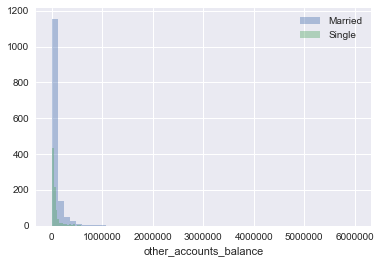

In [232]:
# Visualization 23: Distribution of Sum of Other Account Balance – conditional on marital status

otheraccountsdf = pd.concat(other_accounts)
otheraccountsdf = otheraccountsdf.to_frame()
otheraccountsdf.columns = ['other_accounts_balance']

otherMarital = otheraccountsdf.merge(df[['marital_status']], left_index=True, right_index=True)
otherSingle = otherMarital[(otherMarital.other_accounts_balance>0) & (otherMarital.marital_status==False)]
otherMarried = otherMarital[(otherMarital.other_accounts_balance>0) & (otherMarital.marital_status==True)]

sns.distplot(otherMarried.other_accounts_balance, kde=False, label = "Married")
sns.distplot(otherSingle.other_accounts_balance, kde=False, label="Single")
plt.legend()

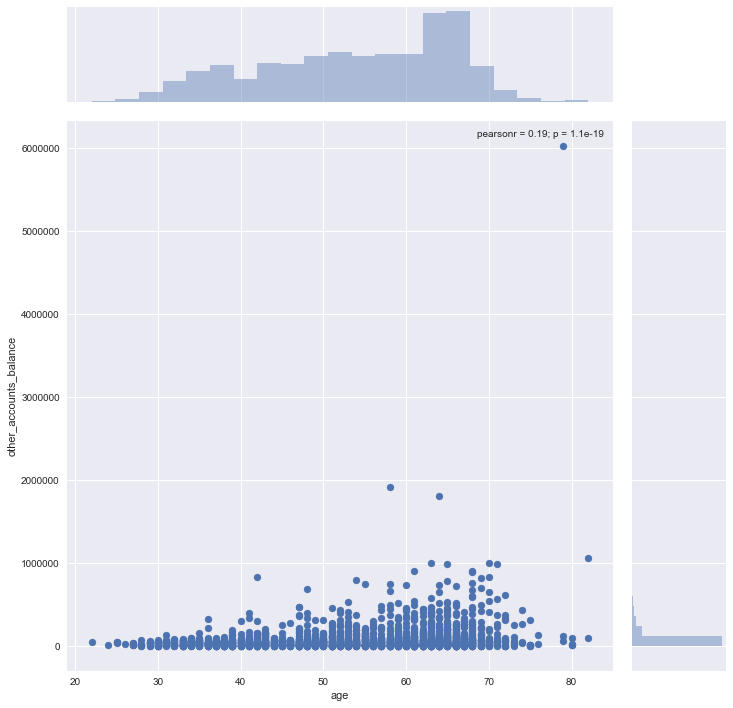

In [233]:
# Visualization 24: Distribution of Sum of Other Account Balance – conditional on age
otherAge = otheraccountsdf.merge(df[['age']], left_index=True, right_index=True)
otherAgeClean = otherAge[otherAge.other_accounts_balance>0]
sns.jointplot(x="age", y="other_accounts_balance", data=otherAgeClean, size = 10)

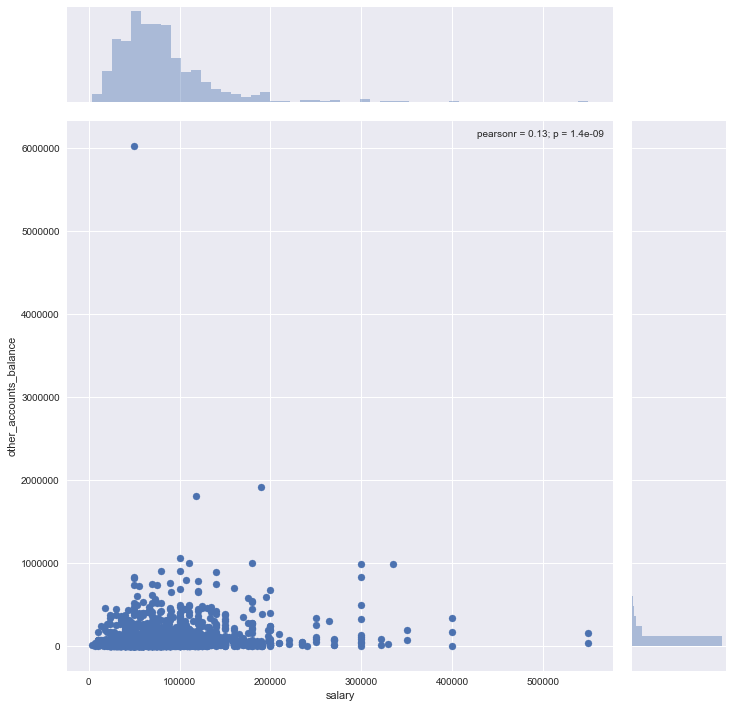

In [234]:
# Visualization 25: Distribution of Sum of Other Account Balance – conditional on salary
otherSalary = otheraccountsdf.merge(df[['salary']], left_index=True, right_index=True)
otherSalaryClean = otherSalary[(otherSalary.other_accounts_balance>0) & (otherSalary.salary>1000)]
sns.jointplot(x="salary", y="other_accounts_balance", data=otherSalaryClean, size = 10)